# Import Libraries

In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')



import pickle
import json
import pickle
import json

# Data Gathering

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [4]:
df["gender"].value_counts().to_dict()
df["gender"].replace({'M': 1, 'F': 0},inplace=True)

In [5]:
df["ssc_percentage"]

0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_percentage, Length: 215, dtype: float64

In [6]:
df["ssc_board"].value_counts().to_dict()
df["ssc_board"].replace({'Central': 1, 'Others': 0},inplace=True)

In [7]:
df["hsc_percentage"]

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_percentage, Length: 215, dtype: float64

In [8]:
df["hsc_board"].value_counts().to_dict()
df["hsc_board"].replace({'Others': 0, 'Central': 1},inplace=True)

In [9]:
df["hsc_subject"].value_counts().to_dict()
df = pd.get_dummies(df, columns=['hsc_subject'])

In [10]:
df["degree_percentage"]

0      58.00
1      77.48
2      64.00
3      52.00
4      73.30
       ...  
210    77.60
211    72.00
212    73.00
213    58.00
214    53.00
Name: degree_percentage, Length: 215, dtype: float64

In [11]:
df["undergrad_degree"].value_counts().to_dict()

{'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11}

In [12]:
df = pd.get_dummies(df, columns=['undergrad_degree'])

In [13]:
df["work_experience"].value_counts().to_dict()
df["work_experience"].replace({'No': 0, 'Yes': 1},inplace=True)

In [14]:
df["emp_test_percentage"] 

0      55.0
1      86.5
2      75.0
3      66.0
4      96.8
       ... 
210    91.0
211    74.0
212    59.0
213    70.0
214    89.0
Name: emp_test_percentage, Length: 215, dtype: float64

In [15]:
df["specialisation"].value_counts().to_dict()
df["specialisation"].replace({'Mkt&Fin': 1, 'Mkt&HR': 0},inplace=True)

In [16]:
df["mba_percent"]


0      58.80
1      66.28
2      57.80
3      59.43
4      55.50
       ...  
210    74.49
211    53.62
212    69.72
213    60.23
214    60.22
Name: mba_percent, Length: 215, dtype: float64

In [17]:
df["status"].value_counts().to_dict()
df["status"].replace({'Placed': 1, 'Not Placed': 0},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      215 non-null    int64  
 1   ssc_percentage              215 non-null    float64
 2   ssc_board                   215 non-null    int64  
 3   hsc_percentage              215 non-null    float64
 4   hsc_board                   215 non-null    int64  
 5   degree_percentage           215 non-null    float64
 6   work_experience             215 non-null    int64  
 7   emp_test_percentage         215 non-null    float64
 8   specialisation              215 non-null    int64  
 9   mba_percent                 215 non-null    float64
 10  status                      215 non-null    int64  
 11  hsc_subject_Arts            215 non-null    uint8  
 12  hsc_subject_Commerce        215 non-null    uint8  
 13  hsc_subject_Science         215 non

# Scaling

In [19]:
x = df.drop('status',axis =1)

std_scaler2 = StandardScaler() # Xmean and Xstd
array1 = std_scaler2.fit_transform(x) # fit + tranform
std_dfx = pd.DataFrame(array1, columns=x.columns)
std_dfx

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,hsc_subject_Arts,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech
0,0.739434,-0.028087,-1.082459,2.268812,-0.800763,-1.140102,-0.724446,-1.291091,-1.123903,-0.597647,-0.232210,0.950082,-0.856663,-1.439246,-0.23221,1.626059
1,0.739434,1.113369,0.923823,1.103448,-0.800763,1.513267,1.380364,1.087157,0.889757,0.687620,-0.232210,-1.052541,1.167321,-1.439246,-0.23221,1.626059
2,0.739434,-0.213238,0.923823,0.153313,1.248809,-0.322843,-0.724446,0.218908,0.889757,-0.769474,4.306443,-1.052541,-0.856663,0.694808,-0.23221,-0.614984
3,0.739434,-1.046417,0.923823,-1.318339,1.248809,-1.957362,-0.724446,-0.460592,-1.123903,-0.489396,-0.232210,-1.052541,1.167321,-1.439246,-0.23221,1.626059
4,0.739434,1.712332,0.923823,0.668391,1.248809,0.943909,-0.724446,1.864806,0.889757,-1.164676,-0.232210,0.950082,-0.856663,0.694808,-0.23221,-0.614984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.739434,1.230940,-1.082459,1.441008,-0.800763,1.529612,-0.724446,1.426906,0.889757,2.098321,-0.232210,0.950082,-0.856663,0.694808,-0.23221,-0.614984
211,0.739434,-0.861266,-1.082459,-0.582513,-0.800763,0.766836,-0.724446,0.143408,0.889757,-1.487711,-0.232210,-1.052541,1.167321,-1.439246,-0.23221,1.626059
212,0.739434,-0.028087,-1.082459,0.061335,-0.800763,0.903046,1.380364,-0.989091,0.889757,1.278706,-0.232210,0.950082,-0.856663,0.694808,-0.23221,-0.614984
213,-1.352386,0.619941,-1.082459,-0.030644,-0.800763,-1.140102,-0.724446,-0.158592,-1.123903,-0.351934,-0.232210,0.950082,-0.856663,0.694808,-0.23221,-0.614984


## Logistic Regression

In [20]:
x = df.drop('status', axis = 1)
y = df.status

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, 
                                    random_state=55, stratify=y)
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train) # Gredient Descent, LogLoss, With threshold of 0.5

LogisticRegression()

In [21]:
log_reg_model.score(x_train, y_train)


0.8604651162790697

In [22]:
log_reg_model.score(x_test, y_test)

0.9069767441860465

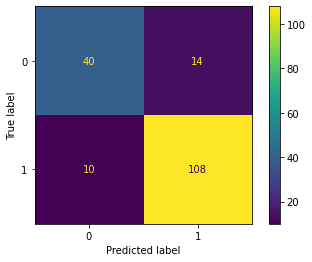

In [23]:
log_reg_model.score(x_train, y_train)
plot_confusion_matrix(log_reg_model , x_train, y_train)

In [24]:
## Evaluation on Training Dataset

y_pred_train = log_reg_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_train, y_pred_train)
print("Precision :",precision_value)

recall_value = recall_score(y_train, y_pred_train)
print('Recall :',recall_value)

f1_value = f1_score(y_train, y_pred_train)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[ 40  14]
 [ 10 108]]
**************************************************
Accuracy is : 0.8604651162790697
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        54
           1       0.89      0.92      0.90       118

    accuracy                           0.86       172
   macro avg       0.84      0.83      0.83       172
weighted avg       0.86      0.86      0.86       172

**************************************************
Precision : 0.8852459016393442
Recall : 0.9152542372881356
F1 Score: 0.9
**************************************************


In [25]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        54
           1       0.89      0.92      0.90       118

    accuracy                           0.86       172
   macro avg       0.84      0.83      0.83       172
weighted avg       0.86      0.86      0.86       172



In [26]:
# Evaluation on Testing Dataset

y_pred = log_reg_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_test, y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_test, y_pred)
print('Recall :',recall_value)

f1_value = f1_score(y_test, y_pred)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[11  2]
 [ 2 28]]
**************************************************
Accuracy is : 0.9069767441860465
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.93      0.93      0.93        30

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43

**************************************************
Precision : 0.9333333333333333
Recall : 0.9333333333333333
F1 Score: 0.9333333333333333
**************************************************


In [27]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.93      0.93      0.93        30

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43



# Save Model

### model

In [28]:
with open(r'artifacts/regression_model.pkl','wb') as f:
    pickle.dump(log_reg_model, f)
    

In [29]:
log_reg_model.n_features_in_

16

### save columns name

In [30]:
column_names = x.columns

project_data = {"Column Names" : column_names.tolist(),
               "gender":{'M': 1, 'F': 0},
               "ssc_board" :{'Central': 1, 'Others': 0},
               "hsc_board" : {'Others': 0, 'Central': 1},
                "work_experience" : {'No': 0, 'Yes': 1},
                "specialisation" : {'Mkt&Fin': 1, 'Mkt&HR': 0}}

with open(r'artifacts/project_data.json','w') as f:
    json.dump(project_data, f)
    

In [31]:
log_reg_model.n_features_in_

16

In [32]:
np.zeros(16)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
np.zeros((1,16))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])